# S5P Tropospheric Nitrogen Dioxide Density: monthly aggregation, planet-covering and analysis ready product

In this tutorial, you will learn how to access the Tropospheric Nitrogen Dioxide Density map generated by [OpengeoHub](https://opengeohub.org/), originally produced by [Copernicus Sentinel-5P](https://maps.s5p-pal.com/), gapfilled and analysis ready. The artifacts were screened by a moving window approach able to identify outliers based on local median and standard deviation values, and the gaps were filled using a time-first (TMWM) approach. This entire dataset is publicly available through Cloud Optimized GeoTIFF (COG), allowing easy and direct access by different GIS softwares (QGIS) and programming languages (Python and R). The COG format takes advantage of the very flexible and time-proven (Geo)TIFF image format to enable fast reading of large raster files, especially in a cloud hosted environments. The specification does several things to achieve this:
it uses efficient compression (deflate), in terms of balancing compression ratio and decompression speedblocks are efficiently organized into tiles (e.g. 512x512 pixels)overviews are built for several zoom levels to speed up resampling into lower resolutions

Worth noting, Original data have the different range of latitude among months. In December, there are no data above N 58°, where is approximately between Iceland and Scotland. Therefore, when it comes to monthly aggregation, there is a strip across N 58° as an artifact. It is not suggested to use this dataset in the region above N 58°.

 First, let's import the necessary modules and functions used by the tutorial:

In [1]:
from functions.access import get_sp5_no2_monthlyaggr_urls, get_sp5_no2_overall_urls,read_overview,read_ts,read_and_plot_ts
import rasterio
from pathlib import Path
import os
import warnings
warnings.filterwarnings('ignore')

The follow helper functions are provided to retrieve the URL addresses for the COG files

In [2]:
sp5_no2_monthlyaggr_urls = get_sp5_no2_monthlyaggr_urls()
sp5_no2_overall_urls = get_sp5_no2_overall_urls()

idx = 0
print(f"Sp5-NO2 Monthly Aggregation COG URLS ({len(sp5_no2_monthlyaggr_urls)} files)")
print(f' - Monthly aggr COG: {sp5_no2_monthlyaggr_urls[idx]}')
print(f' - Monthly aggr overall(p10,p50,p90) COG: {sp5_no2_overall_urls[idx]}')

Sp5-NO2 Monthly Aggregation COG URLS (54 files)
 - Monthly aggr COG: https://s3.openlandmap.org/arco/no2_s5p.l3.trop.tmwm_p50_2km_a_20180501_20180531_go_epsg.4326_v20221219.tif
 - Monthly aggr overall(p10,p50,p90) COG: https://s3.openlandmap.org/arco/no2_s5p.l3.trop.tmwm_p50.p10_2km_a_201805_202211_go_epsg.4326_v20221219.tif


## Overview Access

It's possible to use the [rasterio](https://rasterio.readthedocs.io/) library to access the metadata of these files without read all the data to the memory:

In [3]:
idx = 0
url = sp5_no2_monthlyaggr_urls[idx]
src = rasterio.open(url)

print(f'File {url}\n')
for (key, val) in src.profile.items():
    print(f'-{key}: {val}')

File https://s3.openlandmap.org/arco/no2_s5p.l3.trop.tmwm_p50_2km_a_20180501_20180531_go_epsg.4326_v20221219.tif

-driver: GTiff
-dtype: int16
-nodata: -16000.0
-width: 16383
-height: 6798
-count: 1
-crs: EPSG:4326
-transform: | 0.02, 0.00,-180.00|
| 0.00,-0.02, 87.37|
| 0.00, 0.00, 1.00|
-blockxsize: 512
-blockysize: 512
-tiled: True
-compress: deflate
-interleave: band


Multiplying the width by the height it's possible to understand that it's a BIG image:

In [4]:
n_pixels = src.profile['width'] * src.profile['height']
print(f'Total number of pixels: {n_pixels}')

Total number of pixels: 111371634


However you can use the COG structure to calculate the shape of a low resolution overview, reading a small portion of the data in a quickly thumbnail format:

In [5]:
idx = 12
overview, src = read_overview(sp5_no2_monthlyaggr_urls[idx], oviews_pos=4, verbose=True)
print(f'\nOverview dimensions: {overview.shape}')

Reading https://s3.openlandmap.org/arco/no2_s5p.l3.trop.tmwm_p50_2km_a_20190501_20190531_go_epsg.4326_v20221219.tif
-Available overviews: [2, 4, 8, 16, 32]

Overview dimensions: (212, 511)


Plot the resulting thumbnail:

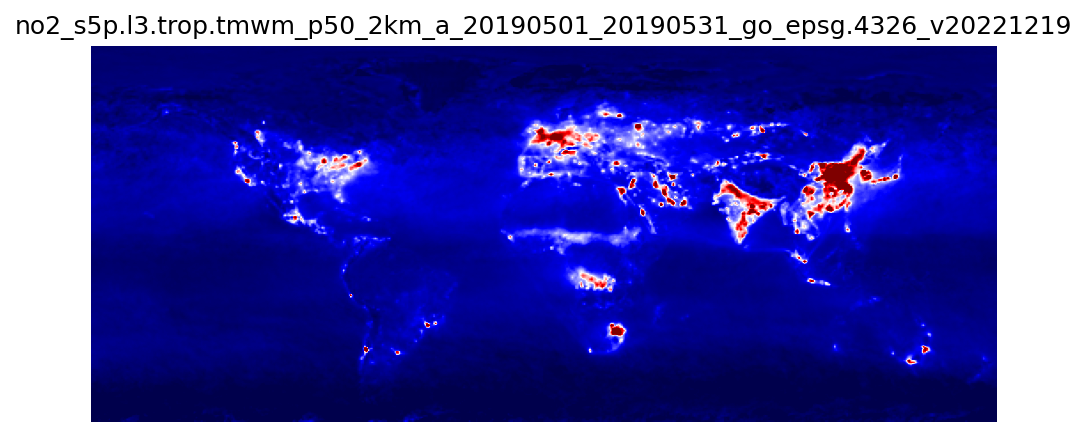

In [6]:
from eumap import plotter
plotter.plot_rasters(overview, figsize=8, cmaps='seismic', nodata=src.nodata, vmin=0, vmax=600, titles=[Path(sp5_no2_monthlyaggr_urls[idx]).stem])

Iterate over the URL list plotting multiple dates:

1. monthly aggregation data over time

Reading https://s3.openlandmap.org/arco/no2_s5p.l3.trop.tmwm_p50_2km_a_20180501_20180531_go_epsg.4326_v20221219.tif
-Available overviews: [2, 4, 8, 16, 32]
Reading https://s3.openlandmap.org/arco/no2_s5p.l3.trop.tmwm_p50_2km_a_20180601_20180630_go_epsg.4326_v20221219.tif
-Available overviews: [2, 4, 8, 16, 32]
Reading https://s3.openlandmap.org/arco/no2_s5p.l3.trop.tmwm_p50_2km_a_20180701_20180731_go_epsg.4326_v20221219.tif
-Available overviews: [2, 4, 8, 16, 32]
Reading https://s3.openlandmap.org/arco/no2_s5p.l3.trop.tmwm_p50_2km_a_20180801_20180831_go_epsg.4326_v20221219.tif
-Available overviews: [2, 4, 8, 16, 32]
Reading https://s3.openlandmap.org/arco/no2_s5p.l3.trop.tmwm_p50_2km_a_20180901_20180930_go_epsg.4326_v20221219.tif
-Available overviews: [2, 4, 8, 16, 32]
Reading https://s3.openlandmap.org/arco/no2_s5p.l3.trop.tmwm_p50_2km_a_20181001_20181031_go_epsg.4326_v20221219.tif
-Available overviews: [2, 4, 8, 16, 32]


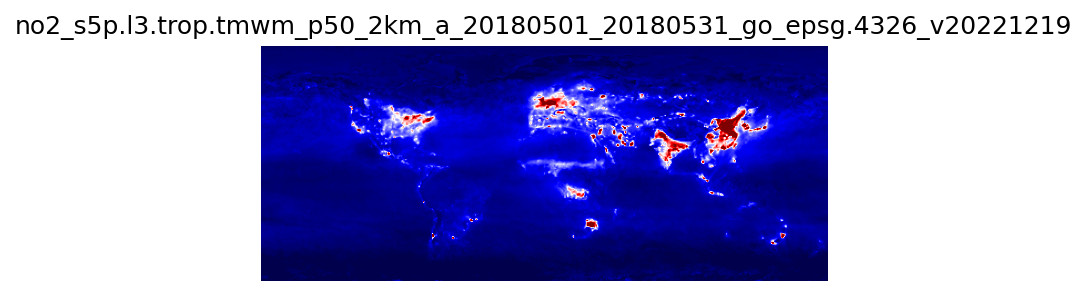

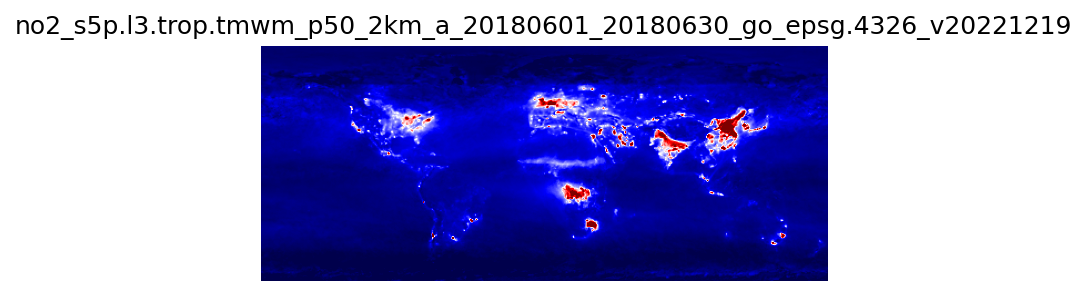

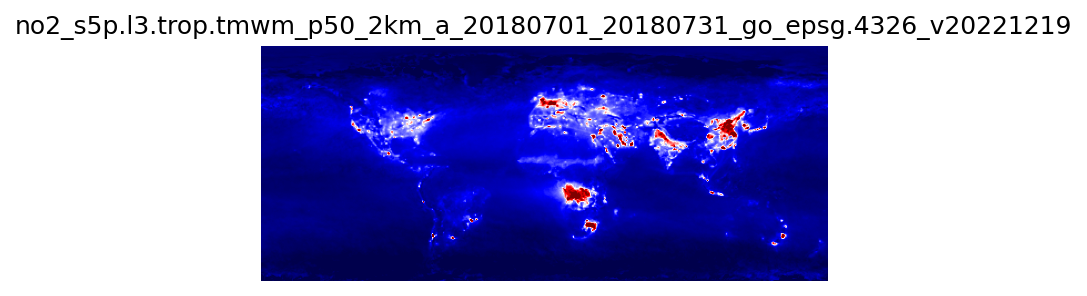

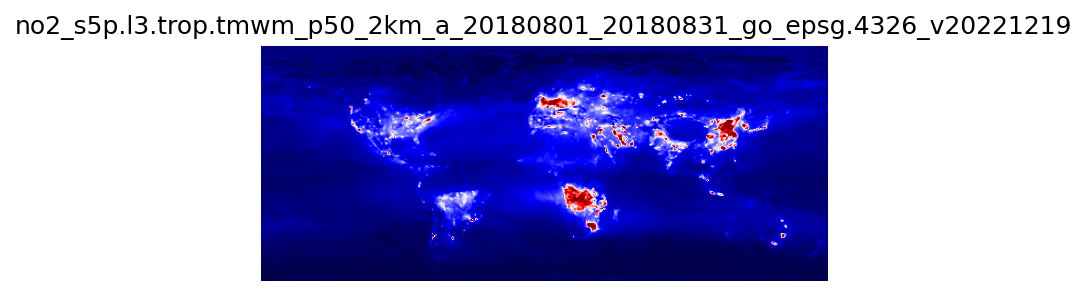

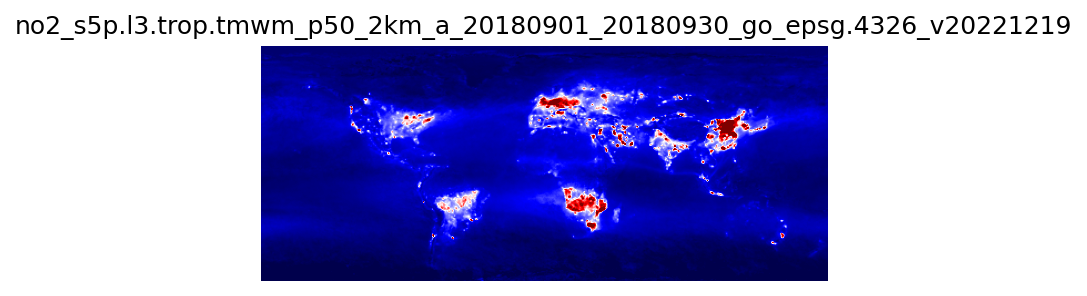

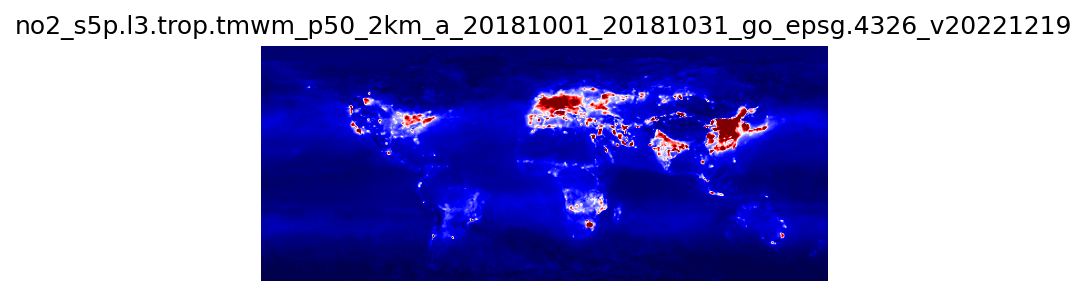

In [7]:
for idx in range(0,6):
    overview, src = read_overview(sp5_no2_monthlyaggr_urls[idx], oviews_pos=4, verbose=True)
    plotter.plot_rasters(overview, figsize=5, cmaps='seismic', nodata=src.nodata, vmin=0, vmax=600, titles=[Path(sp5_no2_monthlyaggr_urls[idx]).stem])

2. overall data in different percentile (p10, p50, p90)

Reading https://s3.openlandmap.org/arco/no2_s5p.l3.trop.tmwm_p50.p10_2km_a_201805_202211_go_epsg.4326_v20221219.tif
-Available overviews: [2, 4, 8, 16, 32]
Reading https://s3.openlandmap.org/arco/no2_s5p.l3.trop.tmwm_p50.p50_2km_a_201805_202211_go_epsg.4326_v20221219.tif
-Available overviews: [2, 4, 8, 16, 32]
Reading https://s3.openlandmap.org/arco/no2_s5p.l3.trop.tmwm_p50.p90_2km_a_201805_202211_go_epsg.4326_v20221219.tif
-Available overviews: [2, 4, 8, 16, 32]


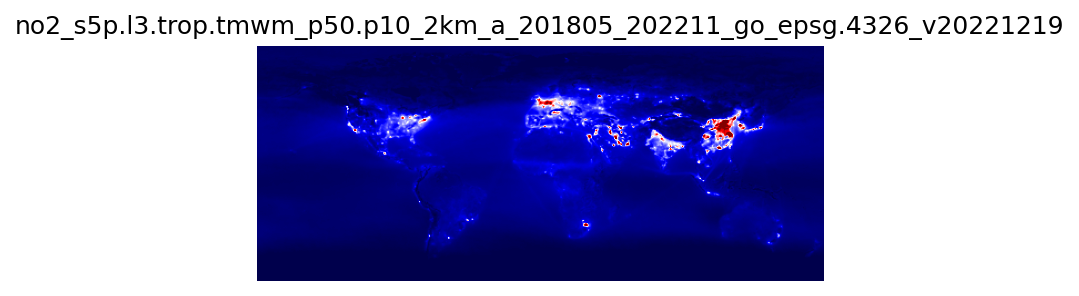

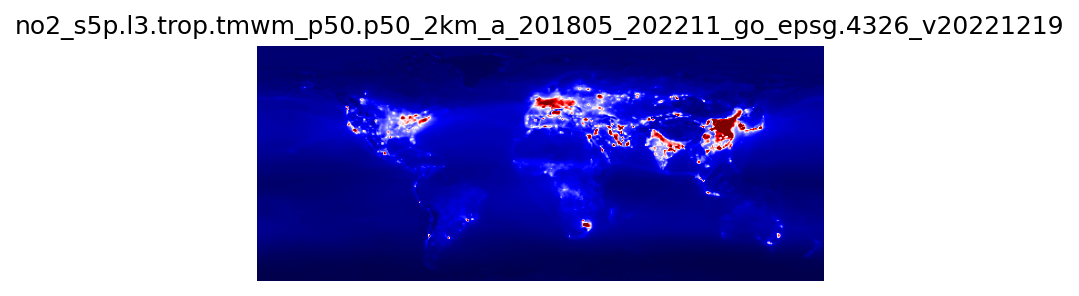

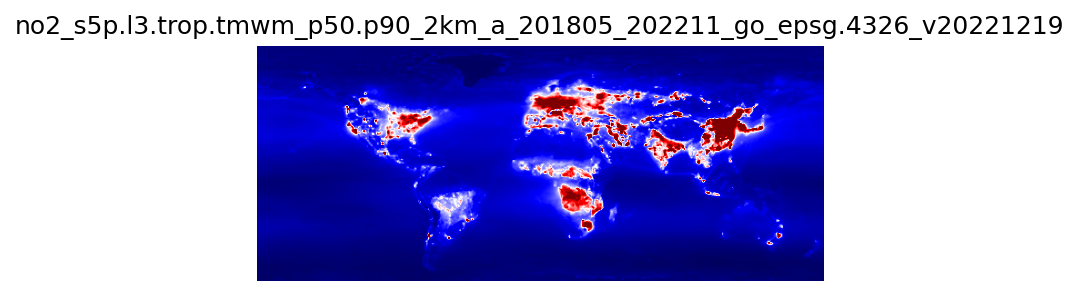

In [8]:
for idx in range(0,3):
    overview, src = read_overview(sp5_no2_overall_urls[idx], oviews_pos=4, verbose=True)
    plotter.plot_rasters(overview, figsize=5, cmaps='seismic', nodata=src.nodata, vmin=0, vmax=600, titles=[Path(sp5_no2_overall_urls[idx]).stem])

## Reading and Writing

To access the dataset in a full resolution, it's recommended subset the COG file by a geographic region.

To help in the definition of this region, let's make an interactive map with [ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/), defining a `DrawControl` and add it to the map controls.

In [9]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, DrawControl, LayersControl

m = Map(center=(51.98, 5.65), zoom = 2, basemap= basemaps.OpenStreetMap.Mapnik)

draw_control = DrawControl()
draw_control.rectangle = {
    "shapeOptions": {
        "color": "#ff0000",
        "fillOpacity": 0,
        "opacity": 1
    }
}

m.add_control(draw_control)
m.add_control(LayersControl())

m

Map(center=[51.98, 5.65], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

Now select the feature from DrawControl.data and get its bounds.

In [10]:
from shapely.geometry import shape
from rasterio.windows import Window, from_bounds

geometry = shape(draw_control.data[-1]['geometry'])
bounds = geometry.bounds
window = from_bounds(bounds[0], bounds[1], bounds[2], bounds[3], src.transform)
print("\nBounds: ", bounds[0], bounds[1], bounds[2], bounds[3])
print("Raster window:", window)


Bounds:  -27.773438 33.380999 43.59375 72.483545
Raster window: Window(col_off=6927.999977244444, row_off=677.4991075555554, width=3248.0000227555556, height=1779.6003157333334)


With the defined window you can quickly read the COG file using the [eumap.raster.read_raster](https://eumap.readthedocs.io/en/latest/_autosummary/eumap.raster.read_rasters.html#eumap.raster.read_rasters) function:

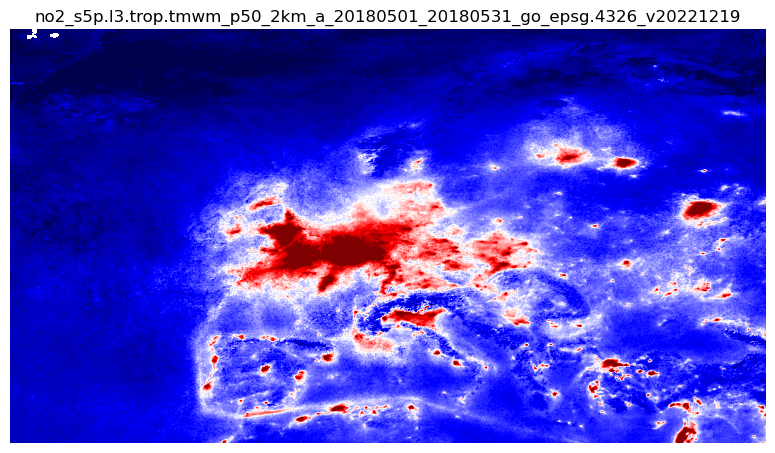

In [11]:
from eumap.raster import read_rasters, save_rasters

idx = 0
cog_url = sp5_no2_monthlyaggr_urls[idx]

data, _ = read_rasters(raster_files=[cog_url], spatial_win=window)
plotter.plot_rasters(data[:,:,0], cmaps='seismic', dpi=100, nodata=src.nodata, vmin=0, vmax=600, titles=[Path(cog_url).stem])

Using [eumap.raster.save_rasters](https://eumap.readthedocs.io/en/latest/_autosummary/eumap.raster.save_rasters.html) you can save the clipped data by passing the COG as the reference file along with the window definition:

In [12]:
raster_dir = Path(os.getcwd())

file_name = f'{Path(sp5_no2_monthlyaggr_urls[idx]).stem}_clip_europe.tif'
file_path = raster_dir.joinpath(file_name)

print(f"Saving file in {file_path}")
r = save_rasters(cog_url, [file_path], data, spatial_win=window)

Saving file in /mnt/freya/faen_func_query/no2_s5p.l3.trop.tmwm_p50_2km_a_20180501_20180531_go_epsg.4326_v20221219_clip_europe.tif


# Time Series Access

Similarly, let's use the efficient structure of COG files to read a time series at a single point from the dateset. 

Make an interactive map again, this time to select a location by drawing a point marker

In [13]:
 from ipyleaflet import Map, basemaps, basemap_to_tiles, DrawControl, LayersControl

m = Map(center=(51.98, 5.65), zoom = 2, basemap= basemaps.OpenStreetMap.Mapnik)

draw_control = DrawControl()
draw_control.point = {
    "shapeOptions": {
        "fillColor": "#ff0000",
        "color": "#ffffff",
        "fillOpacity": 0.6,
        "opacity": 1
    }
}

m.add_control(draw_control)
m.add_control(LayersControl())

m

Map(center=[51.98, 5.65], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

...and again select the geometry from the `DrawControl`.

In [14]:
from shapely.geometry import shape
geometry = shape(draw_control.data[-1]['geometry'])
lon, lat = geometry.x, geometry.y
print(lon, lat)

120.9375 24.179331


the point coordinates to sample the COG file with [rasterio](https://rasterio.readthedocs.io/).

In [15]:
idx = 0
cog_url = sp5_no2_monthlyaggr_urls[idx]

with rasterio.open(cog_url) as ds:
    pixel_val = next(ds.sample([(lon, lat)]))
    print(f'{cog_url}')
    print(f' - Pixel value: {pixel_val}')

https://s3.openlandmap.org/arco/no2_s5p.l3.trop.tmwm_p50_2km_a_20180501_20180531_go_epsg.4326_v20221219.tif
 - Pixel value: [296]


...and now run the sampling in parallel for multiple COG files, and then construct a [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) from the results.

In [16]:
no2_ts = read_ts(lon, lat, sp5_no2_monthlyaggr_urls)
no2_ts

raster_name start_date  end_date  \
0   no2_s5p.l3.trop.tmwm_p50_2km_a_20180501_201805...   20180501  20180531   
1   no2_s5p.l3.trop.tmwm_p50_2km_a_20180601_201806...   20180601  20180630   
2   no2_s5p.l3.trop.tmwm_p50_2km_a_20180701_201807...   20180701  20180731   
3   no2_s5p.l3.trop.tmwm_p50_2km_a_20180801_201808...   20180801  20180831   
4   no2_s5p.l3.trop.tmwm_p50_2km_a_20180901_201809...   20180901  20180930   
5   no2_s5p.l3.trop.tmwm_p50_2km_a_20181001_201810...   20181001  20181031   
6   no2_s5p.l3.trop.tmwm_p50_2km_a_20181101_201811...   20181101  20181130   
7   no2_s5p.l3.trop.tmwm_p50_2km_a_20181201_201812...   20181201  20181231   
8   no2_s5p.l3.trop.tmwm_p50_2km_a_20190101_201901...   20190101  20190131   
9   no2_s5p.l3.trop.tmwm_p50_2km_a_20190201_201902...   20190201  20190228   
10  no2_s5p.l3.trop.tmwm_p50_2km_a_20190301_201903...   20190301  20190331   
11  no2_s5p.l3.trop.tmwm_p50_2km_a_20190401_201904...   20190401  20190430   
12  no2_s5p.l3.trop.tmwm_p50_2km_a_20190501_201905...   20190501  20190531   
13  no2_s5p.l3.trop.tmwm_p50_2km_a_20190601_201906...   20190601  20190630   
14  no2_s5p.l3.trop.tmwm_p50_2km_a_20190701_201907...   20190701  20190731   
15  no2_s5p.l3.trop.tmwm_p50_2km_a_20190801_201908...   20190801  20190831   
16  no2_s5p.l3.trop.tmwm_p50_2km_a_20190901_201909...   20190901  20190930   
17  no2_s5p.l3.trop.tmwm_p50_2km_a_20191001_201910...   20191001  20191031   
18  no2_s5p.l3.trop.tmwm_p50_2km_a_20191101_201911...   20191101  20191130   
19  no2_s5p.l3.trop.tmwm_p50_2km_a_20191201_201912...   20191201  20191231   
20  no2_s5p.l3.trop.tmwm_p50_2km_a_20200101_202001...   20200101  20200131   
21  no2_s5p.l3.trop.tmwm_p50_2km_a_20200201_202002...   20200201  20200229   
22  no2_s5p.l3.trop.tmwm_p50_2km_a_20200301_202003...   20200301  20200331   
23  no2_s5p.l3.trop.tmwm_p50_2km_a_20200401_202004...   20200401  20200430   
24  no2_s5p.l3.trop.tmwm_p50_2km_a_20200501_202005...   20200501  20200531   
25  no2_s5p.l3.trop.tmwm_p50_2km_a_20200601_202006...   20200601  20200630   
26  no2_s5p.l3.trop.tmwm_p50_2km_a_20200701_202007...   20200701  20200731   
27  no2_s5p.l3.trop.tmwm_p50_2km_a_20200801_202008...   20200801  20200831   
28  no2_s5p.l3.trop.tmwm_p50_2km_a_20200901_202009...   20200901  20200930   
29  no2_s5p.l3.trop.tmwm_p50_2km_a_20201001_202010...   20201001  20201031   
30  no2_s5p.l3.trop.tmwm_p50_2km_a_20201101_202011...   20201101  20201130   
31  no2_s5p.l3.trop.tmwm_p50_2km_a_20201201_202012...   20201201  20201231   
32  no2_s5p.l3.trop.tmwm_p50_2km_a_20210101_202101...   20210101  20210131   
33  no2_s5p.l3.trop.tmwm_p50_2km_a_20210201_202102...   20210201  20210228   
34  no2_s5p.l3.trop.tmwm_p50_2km_a_20210301_202103...   20210301  20210331   
35  no2_s5p.l3.trop.tmwm_p50_2km_a_20210401_202104...   20210401  20210430   
36  no2_s5p.l3.trop.tmwm_p50_2km_a_20210501_202105...   20210501  20210531   
37  no2_s5p.l3.trop.tmwm_p50_2km_a_20210601_202106...   20210601  20210630   
38  no2_s5p.l3.trop.tmwm_p50_2km_a_20210701_202107...   20210701  20210731   
39  no2_s5p.l3.trop.tmwm_p50_2km_a_20210801_202108...   20210801  20210831   
40  no2_s5p.l3.trop.tmwm_p50_2km_a_20210901_202109...   20210901  20210930   
41  no2_s5p.l3.trop.tmwm_p50_2km_a_20211001_202110...   20211001  20211031   
42  no2_s5p.l3.trop.tmwm_p50_2km_a_20211101_202111...   20211101  20211130   
43  no2_s5p.l3.trop.tmwm_p50_2km_a_20211201_202112...   20211201  20211231   
44  no2_s5p.l3.trop.tmwm_p50_2km_a_20220101_202201...   20220101  20220131   
45  no2_s5p.l3.trop.tmwm_p50_2km_a_20220201_202202...   20220201  20220228   
46  no2_s5p.l3.trop.tmwm_p50_2km_a_20220301_202203...   20220301  20220331   
47  no2_s5p.l3.trop.tmwm_p50_2km_a_20220401_202204...   20220401  20220430   
48  no2_s5p.l3.trop.tmwm_p50_2km_a_20220501_202205...   20220501  20220531   
49  no2_s5p.l3.trop.tmwm_p50_2km_a_20220601_202206...   20220601  20220630   
50  no2_s5p.l3.trop.tmwm_p50_2km_a_20220701_202207...   20220701

It's possible to save the result in a CSV file:

In [17]:
no2_ts.to_csv(raster_dir.joinpath('time_series_overlay.csv'))

It's also possible to plot the trend of NO2 density. Share what do you find from the trend!

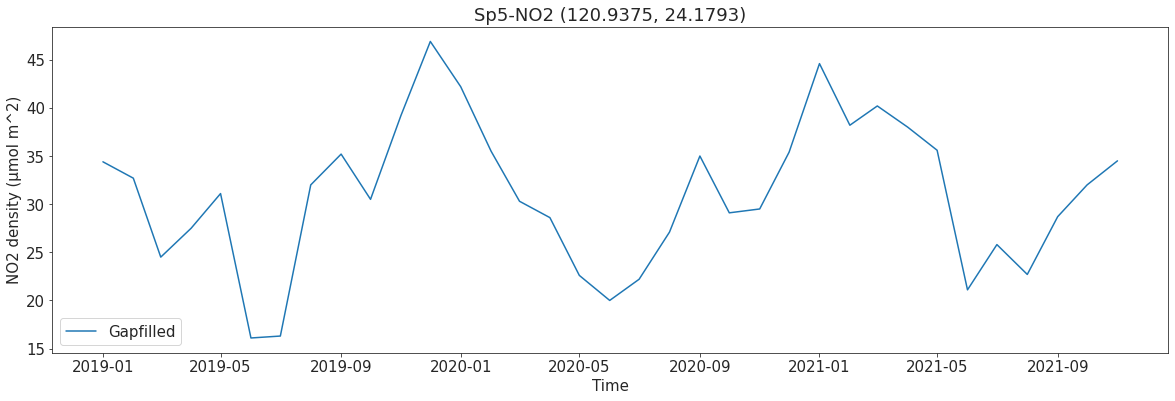

In [18]:
read_and_plot_ts(lat, lon, '01/2019','12/2021')